
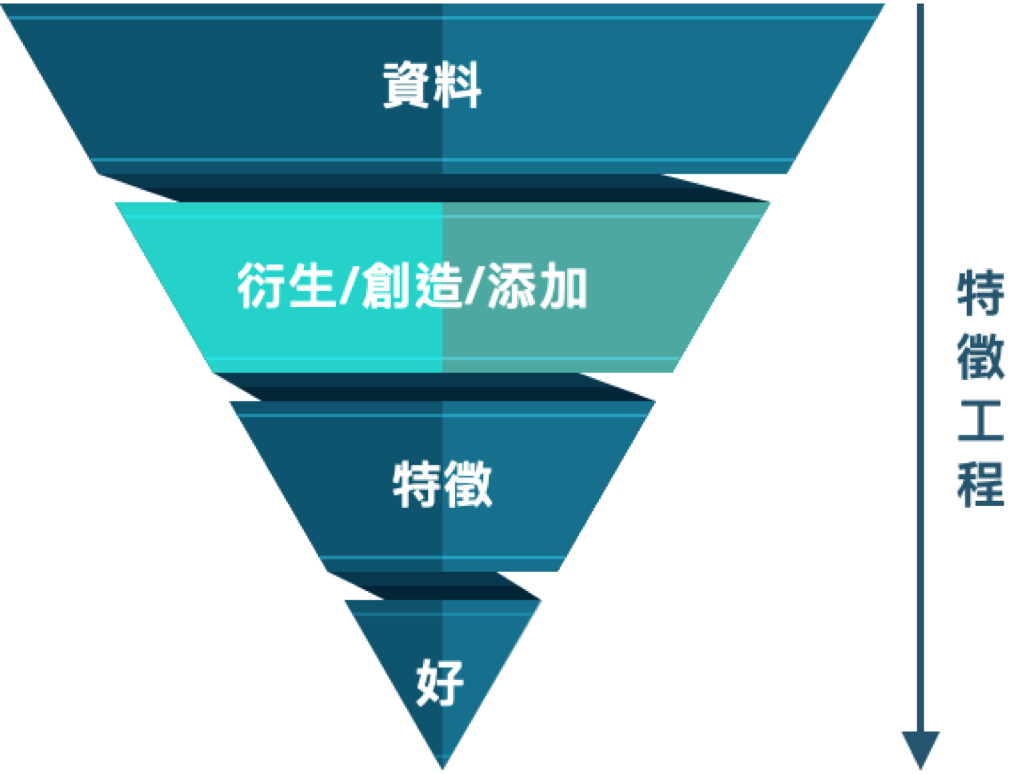

為什麼要做特徵選擇？
1. 減少特徵數量，使模型泛化能力更強，減少過擬合(overfitting)
2. 增強特徵和目標之間的解釋力

特徵選取的三大方法

1. 過濾法(Filter) ：過濾法是列入一些篩選特徵的標準，把具變化性以及與目標變數相關的特徵，挑選出具變化性以及中高度相關的特徵，方法包含：
    1. 移除低變異數的特徵
    2. 單變量特徵選取（Univariate Feature Selection）
    3. 目標變數為離散型，採用卡方檢定(chi2)
    4. 目標變數為連續型，可採用 f_regression
2. 包裝法(Wrapper)：將特徵選擇看作是搜索問題，根據某一種評量標準，每次選擇某些特徵或排除某些特徵，常用的方法為遞歸特徵消除(RFE)。
3. 嵌入法(Embedded)：嵌入法先使用機器學習或模型進行訓練，得到某些特徵的權重係數，根據係數的重要性來選擇特徵，類似過濾法，但是採用訓練的結果來選擇特徵。
4. 運用 sklearn.feature_selection 裡的函數

過濾法： 
    1. 移除低變異數的特徵

In [ ]:
filter1=VarianceThreshold(threshold=(100))   # 設定變異數的門檻值為 100。只有變異數 > 100 的特徵才會被保留。
data_filter1= filter1.fit_transform(data[num_features]) #執行 fit_transform() 計算變異數並過濾
display(data_filter1)
print("Variances is %s" % filter1.variances_) #計算每一個特徵的變異數
print("The surport is %s" % filter1.get_support(True)) #確定那些特徵符合條件留下   回傳的是欄位索引（column index）：

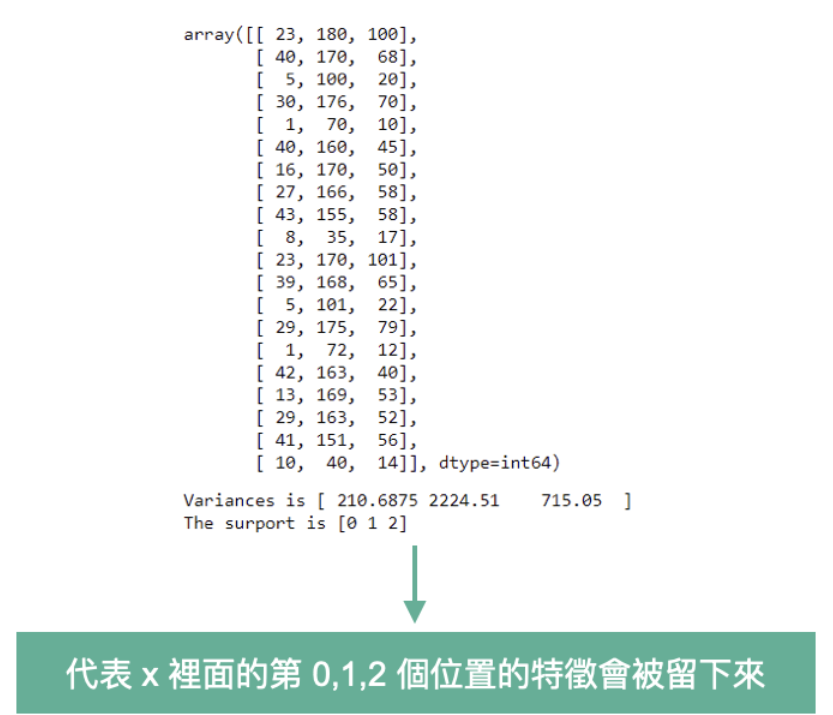

過濾法： 
    2. 單變量特徵選取

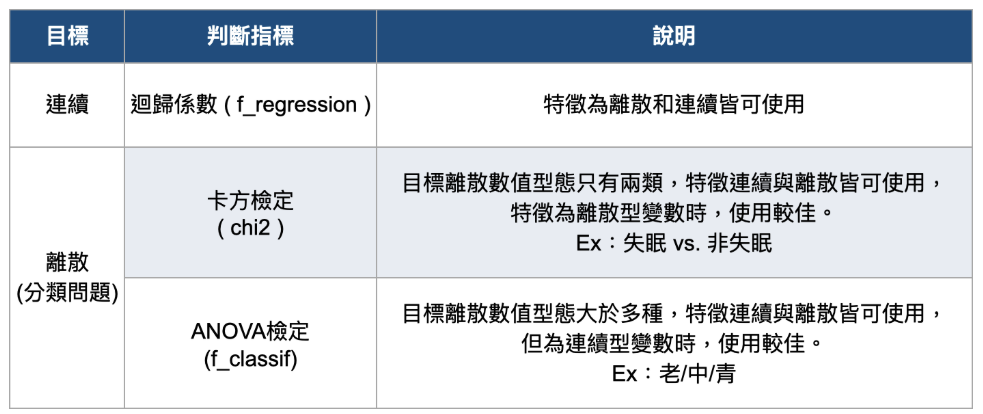

依照哪一個方法挑選單變量特徵

SelectKBest：選取 K 個最好的特徵，k 為參數，代表你想選擇多少特徵。

SelectPercentile：選取多少百分比的特徵，percentile 為參數，代表百分比，用 10 代表 10%。

單變量特徵選取 - 預測失眠狀態(目標變數離散)

Step1：sex 離散型要先轉成數值型態

Step 2：根據目標變量是連續或離散，來決定判斷的準則。
離散型，採用 chi2

Step 3：依照哪一個方法挑選單變量特徵
這邊採用SelectKBest

In [ ]:
#離散型資料+連續
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
##ValueError: could not convert string to float: 'Male'
#離散型資料要先轉成數值
sex_mapping = {
           'Male': 1,
           'Female': 0}
data['sex1'] = data['sex'].map(sex_mapping)

x=data[['sex1','age', 'height', 'weight']]
display(x)
y=data['insomnia']
x_new = SelectKBest(chi2, k=2).fit_transform(x, y)
x_new.shape
display(x_new)

單變量特徵選取 - 目預測體重(目標變數連續)

Step 1：sex 與 insomnial 離散型要先轉成數值型態

Step 2：根據目標變量是連續或離散，來決定判斷的準則
連續型，採用 f_regression

Step 3：依照哪一個方法挑選單變量特徵，這邊採用 SelectPercentile

In [ ]:
# 假設用失眠狀態、身高，來預測體重--->體重連續型變數，迴歸問題。
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
##ValueError: could not convert string to float: 'Male'
#離散型資料要先轉成數值
insomnia_mapping = {
           'Y': 1,
           'N': 0}
data['insomnia1'] = data['insomnia'].map(insomnia_mapping)
sex_mapping = {
           'Male': 1,
           'Female': 0}
data['sex1'] = data['sex'].map(sex_mapping)

x=data[['sex1','age', 'height','insomnia1']]
display(x)
y=data['weight']
x_new = SelectPercentile(chi2, percentile=50).fit_transform(x, y)
x_new.shape
display(x_new)

包裝法：
Step 1：sex 離散型要先轉成數值型態

Step 2：根據目標變量是連續或離散，來決定判斷的準則。
離散型，SVC(kernel=“linear”)

Step 3：設定 RFE 裡面的參數
n_features_to_select：最後要選擇留下多少特徵。
Step：刪除法，每一部刪除多少特徵。

Step 4：.fit(x.y)：每一步都依不同的特徵組合建立模型，判斷最終要選擇那些特徵

Step 5：透過 support_ 呈現包裝法搭配 SVC 下，選擇最好的特徵，用 True 來表示

Step 6：透過 ranking_ 呈現每個特徵對於模型的重要性，1 代表被選重的特徵，2 代表次之重要的特徵，依此類推

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

#  將分類資料 'sex' 做數值轉換，因為 SVC 不接受文字資料
# 'Male' 轉成 1，'Female' 轉成 0
sex_mapping = {
    'Male': 1,
    'Female': 0
}
data['sex1'] = data['sex'].map(sex_mapping)  # 建立新欄位 'sex1' 儲存轉換結果

#  建立特徵變數 x，包含數值型欄位（轉換後的 sex1、年齡、身高、體重）
x = data[['sex1', 'age', 'height', 'weight']]

# 顯示前幾筆 x 的內容以確認資料無誤（僅在 Jupyter Notebook 執行）
display(x)

#  若目標變數 'insomnia' 是文字類別（如 'Y'/'N'），也需轉換成數值
# insomnia_mapping = {
#     'Y': 1,
#     'N': 0
# }
# data['insomnia1'] = data['insomnia'].map(insomnia_mapping)

#  指定目標變數 y（失眠與否），用數值型的 insomnia1
y = data['insomnia1']

#  建立一個支援向量機分類器（線性核函數）
estimator = SVC(kernel="linear")

#  建立 RFE 遞迴式特徵消除器，設定最終保留 2 個特徵，每次移除 1 個
selector = RFE(estimator, n_features_to_select=2, step=1)

#  用 x 和 y 來訓練 RFE 模型，找出對目標變數最重要的特徵
selector = selector.fit(x, y)

#  印出支援布林陣列，True 表示被選中的特徵
print(selector.support_)

#  印出每個特徵的排名，1 表示最重要，被選中
ranking = selector.ranking_
print(ranking)

#  將被選中的特徵名稱存成列表，方便後續使用
rfe_feature = x.loc[:, selector.support_].columns.tolist()
print(rfe_feature)
